# 英特尔前沿AI算法与实践
## OpenCV-Python 入门
### 1.了解和安装 OpenCV-Python
#### Python语法简洁、编写高效，但相比C/C++运行慢很多。然而Python可以很容易地扩展C/C++。OpenCV-Python就是用Python包装了C++的实现，背后实际就是C++的代码在跑，运行速度非常接近原生。另外，图像是矩阵数据，OpenCV-Python原生支持Numpy，为矩阵运算、科学计算提供了极大的便利性。
### 安装
#### 只需终端下的一条指令：


In [1]:
!pip install opencv-python
!pip install numpy

#### pip是Python的包管理器，如果你还没安装Python，强烈推荐安装Anaconda，它包含了大量的科学计算包，不用后期一个个安装。
#### Anaconda安装
进入Anaconda官网，下载最新版本的安装文件，速度比较慢的话，可以去清华开源镜像站。

Windows版是exe文件，双击直接安装，安装时记得勾选 Add Anaconda to my PATH environment variable，添加到环境变量。
Linux版是sh文件，执行bash Anaconda3-xx.sh，Linux版也会提示添加到环境变量，记得输yes就行。
MAC版是pkg文件，同样直接双击安装即可。
安装测试
Python的版本可以在终端中输入python --version来查看。对于OpenCV，打开Python的开发环境，输入import cv2，运行没有报错说明一切正常。要查看OpenCV的版本，可以：


In [2]:
import cv2
print(cv2.__version__)

4.8.0


### 2.图像基本操作
#### 读入图像
#### 使用cv2.imread()来读入一张图片：
参数1：图片的文件名
如果图片放在当前文件夹下，直接写文件名就行，如'cats.jpeg'
否则需要给出绝对路径，如'D:\OpenCVSamples\cats.jpeg'
参数2：读入方式，省略即采用默认值
cv2.IMREAD_COLOR：彩色图，默认值(1)
cv2.IMREAD_GRAYSCALE：灰度图(0)
cv2.IMREAD_UNCHANGED：包含透明通道的彩色图(-1)

返回值：numpy array对象

小tips：路径中不能有中文，并且没有加载成功的话是不会报错的，print(img)的结果为None，后面用到时才会报错，千万别踩坑。

> - img所包含的内容是什么？大小如何？如何访问  img 本身就是一个numpy的数组，通过`shape` `item`可以查看大小和具体元素值
> - 如何理解照片的大小？标准图片的坐标系是？

In [2]:
img = cv2.imread("cats.jpeg")             #读入一幅小猫图像
print(img.size)
print(img.dtype)
print(img.shape)
# 形状中包括行数、列数和通道数
height, width, channels = img.shape

# img是灰度图的话：height, width = img.shape

2359296
uint8
(768, 1024, 3)


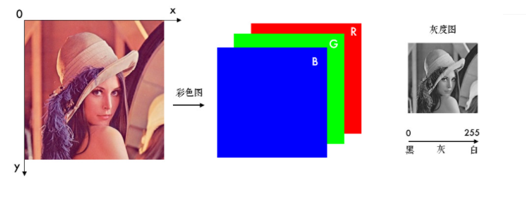

图像属性获取：img.shape获取图像的形状，图片是彩色的话，返回一个包含行数（高度）、列数（宽度）和通道数的元组，灰度图只返回行数和列数：

img.dtype获取图像数据类型，img.size获取图像总像素数。

#### 显示图像
#### 使用cv2.imshow()显示图片，窗口会自适应图片的大小
参数1是窗口的名字，参数2是要显示的图片。不同窗口之间用窗口名区分，所以窗口名相同就表示是同一个窗口，显示结果如下：

In [3]:
import cv2
img = cv2.imread("cats.jpeg")  
cv2.imshow("cats", img)                   #显示出这幅图像

cv2.waitKey(0)                            #弹出图像框，需手动关闭，不然程序阻塞在这里
cv2.destroyAllWindows()

cv2.waitKey()是等待用户键盘输入，参数是等待时间（毫秒ms）。时间一到，会继续执行接下来的程序，传入0的话表示一直等待。等待期间获取用户的按键输入(Ascii码)：k = cv2.waitKey(0)。

#### 保存图像
#### 使用cv2.imwrite()保存图片，参数1是包含后缀名的文件名，参数2是图像矩阵。

In [ ]:
cv2.imwrite('cat_gray.jpg', img)

是不是很简单，再接再厉哦~~~

### 3.像素点的基本操作
#### 这一小节学习获取和修改像素点的值，ROI感兴趣区域，通道分离、颜色空间转换、掩膜等基本操作。
#### 首先，我们来获取和修改像素点的值

In [4]:
import cv2
img = cv2.imread("cats.jpeg")


通过行列的坐标来获取某像素点的值，对于彩色图，结果是B,G,R三个值的列表，对于灰度图或单通道图，只有一个值  
**读取值的时候，要注意第三个值的索引范围**

In [ ]:
px = img[400, 208]
print(px) 

# 只获取蓝色blue通道的值
px_blue = img[400, 208,0]
print(px_blue) 

In [ ]:
img[400,207] = [255,255,255]

这里需要注意，行对应y，列对应x，其实是通过img[y, x]来访问像素点的值哦~~~
修改像素的值也是同样的方式：  

```python
img[1,1,1] = 255
img[1,1] = (255,255,255)
```

In [ ]:
img[400,208] = [255,255,255]
print(img[400, 208])  # [255 255 255]

> **思考**  
如何生成一个300x480 纯蓝的图？

In [8]:
import numpy as np

a = np.zeros([480,300,3],dtype = 'uint8')
### start code here
a[:,:,1:3]=255
### end code
cv2.imshow('img', a)
cv2.waitKey(0)
cv2.destroyAllWindows()

另外，numpy中的 asarray、copy、reshape等函数也经常会使用到。

#### ROI
#### ROI：Region of Interest，感兴趣区域。比如我们要检测眼睛，因为眼睛肯定在脸上，所以我们感兴趣的只有脸这部分，其他都不关心，所以可以单独把脸截取出来，这样就可以大大节省计算量，提高运行速度。截取ROI非常简单，指定图片的范围即可。

In [9]:
img = cv2.imread("cats.jpeg")
observerArea = img[167:647,425:618]
cv2.imshow("Observer",observerArea)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

> **思考** 如何将cat.jpeg的右下角水印去掉，而且尽量没有违和感

In [ ]:
import cv2

img = cv2.imread('cats.jpeg')
cv2.imshow('src',img)
print(img.shape)
### start code 

### end code
cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 4.绘图功能
当我们找到图像中的一些特征（轮廓、边缘等），可以通过画线、圆和矩形等几何形状标记出来，也可以给图片添加文字。
绘制形状的函数有一些共同的参数，提前说明一下：
- img：要绘制形状的图片
- color：绘制的颜色：彩色图就传入BGR的一组值，如蓝色就是(255,0,0)，灰度图，传入一个灰度值就行
- thickness：线宽，默认为1；对于矩形/圆之类的封闭形状而言，传入-1表示填充形状
#### 小tips：所有绘图函数均会直接影响原图片，如果不想影响原图，可以用img.copy()生成一份拷贝再画。

#### 画线
画直线只需指定起点和终点的坐标：

In [10]:
import cv2
import numpy as np

# 创建一副黑色的图片
img = np.zeros((512, 512, 3), np.uint8)
# 画一条线宽为5的蓝色直线，参数2：起点，参数3：终点
img_bk = img.copy()
cv2.line(img_bk, (0, 0), (512, 512), (255, 0, 0), 5)
cv2.imshow('img',img_bk)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

#### 画矩形
画矩形需要知道左上角和右下角的坐标：

In [11]:
# 画一个绿色边框的矩形，参数2：左上角坐标，参数3：右下角坐标
cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
cv2.imshow('img',img)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

#### 画圆
画圆需要指定圆心和半径，注意下面的例子中线宽=-1代表填充

In [12]:
# 画一个填充红色的圆，参数2：圆心坐标，参数3：半径
cv2.circle(img, (447, 63), 63, (0, 0, 255), -1)
cv2.imshow('img',img)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

#### 添加文字
使用cv2.putText()添加文字，它的参数也比较多：
参数2：要添加的文本
参数3：文字的起始坐标（左下角为起点）
参数4：字体
参数5：文字大小（缩放比例）

In [13]:

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (10, 500), font,
            4, (255, 255, 255), 2, lineType=cv2.LINE_AA)
cv2.imshow('img',img)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

### 小练习1： 鼠标响应事件

In [ ]:
import cv2
import numpy as np
drawing = False
mode = True  # if True, draw rectangle. Press 'm' to toggle to curve
ix, iy = -1, -1

# mouse callback function
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode, img
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                ### start code
                
                
                ### end code
            else:
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
                cv2.imshow('image', img)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 1)
        else:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow('image', img)

#创建一块黑色背景图
img = np.zeros((400, 600, 3), np.uint8)
cv2.namedWindow('image')
cv2.imshow('image',img)
###注册回调函数 draw_circle
###start code

### end code
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k ==27:
        break
cv2.destroyAllWindows()

### 5.视频操作
#### 使用摄像头，需要使用cv2.VideoCapture(0)创建VideoCapture对象，参数0指的是摄像头的编号，
#### 如果你电脑上有两个摄像头的话，访问第2个摄像头就可以传入1，依此类推。
#### 操作流程，先占用，再读取，最后释放,一定要记得释放！


In [4]:
import cv2

camera = cv2.VideoCapture(0)
print(camera.isOpened())
#start code
while(True):
    ret, frame = camera.read()             # 一帧一帧采集图像   
    cv2.imshow('Press q to Exit',frame)              # 显示图像
    
    if cv2.waitKey(30) == ord('q'):  # 按下空格键退出
        break

#end code
camera.release()                           # 清除内存
cv2.destroyAllWindows()

True


camera.read()函数返回的第1个参数ret是一个布尔值，表示当前这一帧是否获取正确。第二个参数返回当前帧的数字矩阵。

#### 播放本地视频，跟打开摄像头一样，如果把摄像头的编号换成视频的路径就可以播放本地视频了。
#### 想一下cv2.waitKey()，它的参数表示暂停时间，所以这个值越大，视频播放速度越慢，反之，播放速度越快，通常设置为25或30。


In [8]:
# 播放本地视频
capture = cv2.VideoCapture('orange.mp4')
frame_w = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_h = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = capture.get(cv2.CAP_PROP_FPS)
print(frame_w,frame_h,fps)
while(capture.isOpened()):
    ret, frame = capture.read()
    if ret:
        cv2.imshow('frame', frame)
        if cv2.waitKey(30) == ord('q'):
            break
    else:
        break

capture.release()
cv2.destroyAllWindows()   

1280.0 720.0 29.92753656655413


#### 录制视频
#### 之前我们保存图片用的是cv2.imwrite()，要保存视频，我们需要创建一个VideoWriter的对象，需要给它传入四个参数：

##### 输出的文件名，如'output.avi'
##### 编码方式FourCC码
##### 帧率FPS
##### 要保存的分辨率大小 这个地方需要注意，先宽后高
FourCC是用来指定视频编码方式的四字节码，所有的编码可参考Video Codecs(https://www.fourcc.org/codecs.php)。
例如MJPG编码可以这样写： cv2.VideoWriter_fourcc(*'MJPG')或cv2.VideoWriter_fourcc('M','J','P','G')

In [ ]:
import cv2
capture = cv2.VideoCapture(0)

# 定义编码方式并创建VideoWriter对象
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
outfile = cv2.VideoWriter('output.avi', fourcc, 25, (640, 480))

while(capture.isOpened()):
    ret, frame = capture.read()

    if ret:
        outfile.write(frame)  # 写入文件
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == ord('q'):
            print(frame.shape)
            break
    else:
        break
outfile.release()
cv2.destroyAllWindows()

### 小练习2：采集视频图像

In [2]:
import numpy as np
import cv2
import time
import os
from PIL import Image

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10, 25)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2

print('Input image class index: ', end = '')
class_index = input()

print('Input maximum image number of class {}: '.format(class_index), end = '')
max_image_num = input()


folder_path = os.path.join('./data', str(class_index))
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

i = 0
while(True):
    ret, frame = cap.read()

    saved_file_path = os.path.join(folder_path, 'image_' + str(i) + '.png')
    cv2.imwrite(saved_file_path, frame)

    cv2.putText(frame,'Image: ' + str(i), 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)

    cv2.imshow('frame', frame)
    cv2.waitKey(100)
    i+=1

    if cv2.waitKey(1) == 27 or i >= int(max_image_num):
        break

cap.release()
cv2.destroyAllWindows()

Input image class index: 1
Input maximum image number of class 1: 100


### 6 图像的算术操作
#### 图像相加
叠加两张图片，可以用cv2.add()函数，相加两幅图片的形状（高度/宽度/通道数）必须相同！numpy中可以直接用res = img + img1相加，但这两者的结果并不相同：

In [12]:
import numpy as np
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x, y))  # 250+10 = 260 => 255
print(x + y)  # 250+10 = 260 % 256 = 4

[[255]]
[4]


图像混合cv2.addWeighted()也是一种图片相加的操作，只不过两幅图片的权重不一样，γ相当于一个修正值：
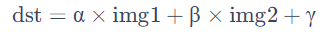

In [7]:
img1 = cv2.imread('lena.jpg')
img2 = cv2.imread('opencvlogo.jpg')
print(img1.shape)
print(img2.shape)
img2_resize = cv2.resize(img2,(img1.shape[1],img1.shape[0]),cv2.INTER_LINEAR)
res = cv2.addWeighted(img1, 0.6, img2_resize, 0.4, 0)

cv2.imshow('blend',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

(611, 636, 3)
(489, 525, 3)


#### 按位操作包括按位与/或/非/异或操作，可以实现图像的混合与局部遮挡等效果。
![jupyter](./bit_and.jpg)

掩膜(Mask)是用一副二值化图片对另外一幅图片进行局部的遮挡，“与”操作，即掩膜图像白色区域是对需要处理图像像素的保留，黑色区域是对需要处理图像像素的剔除.函数原型： 

bitwise_and(src1, src2, mask=None) 

参数说明： 
src1、src2：为输入图像, mask：图像掩膜,为8位单通道的灰度图像，输出图像像素只有mask对应位置元素不为0的部分才输出，否则该位置像素的所有通道分量都设置为0.返回值为图像矩阵。

类似的，也有bitwise_or,bitwise_not,bitwise_xor等按位操作。图像之间的混合除了按位操作之外，还有图像间的相加操作。用cv2.add 和 cv2.addWeighted函数来实现。

In [1]:
import numpy as np 
import cv2

rectangle = np.zeros([300,300],dtype="uint8")
cv2.rectangle(rectangle,(25,25),(275,275),128,-1)
cv2.imshow("Rectangle",rectangle)

circle = np.zeros([300,300],dtype="uint8")
cv2.circle(circle,(150,150),150,128,-1)
cv2.imshow("Circle",circle)
cv2.waitKey(0)

mask = np.zeros([300,300],dtype="uint8")
cv2.rectangle(mask,(75,25),(175,175),1,-1)
cv2.imshow("mask",mask)
cv2.waitKey(0)

bitwiseAnd = cv2.bitwise_and(rectangle,circle,mask = mask)
cv2.imshow("And",bitwiseAnd)
cv2.waitKey(0)

bitwiseOr = cv2.bitwise_or(rectangle,circle)
cv2.imshow("OR",bitwiseOr)
cv2.waitKey(0)

bitwiseXor = cv2.bitwise_xor(rectangle,circle)
cv2.imshow("XOR",bitwiseXor)
cv2.waitKey(0)

bitwiseNot = cv2.bitwise_not(rectangle)
cv2.imshow("Not",bitwiseNot)
cv2.waitKey(0)

cv2.destroyAllWindows()

#### 练一练：
运用mask 及bitwise_and 操作将图像处理成如下样子：
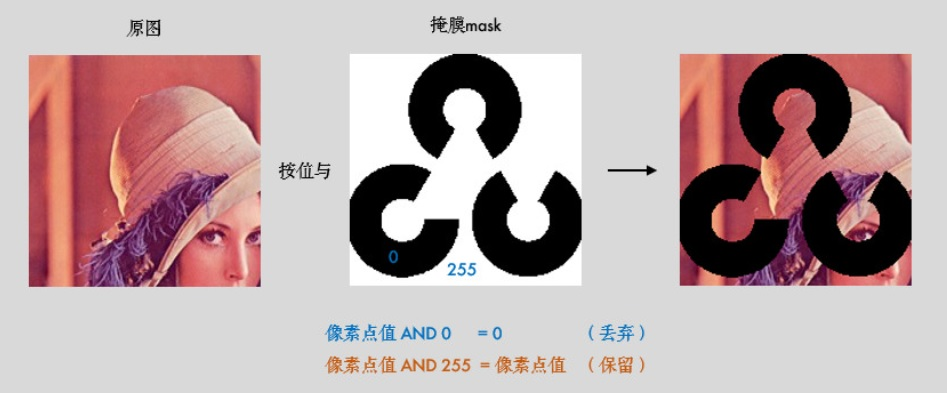

In [3]:
import cv2
import numpy as np
img = cv2.imread('opencvlogo.jpg',0)
h,w = img.shape

img_lena = cv2.imread('lena.jpg')
cv2.imshow("img", img_lena)
img_lena_ = img_lena[0:h,0:w,:]
cv2.imshow("result", img_lena_)
####start code
ret,mask = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
cv2.imshow("result", mask)
res = cv2.bitwise_and(img_lena_,img_lena_,mask = mask)

####end code 
cv2.imshow("result", res)

cv2.waitKey(0)                            
cv2.destroyAllWindows() 

### 小练习3：

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('opencvlogo.jpg')
h,w,channel = img.shape
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
mask_logo = cv2.bitwise_not(mask)

### start code
### 取OpenCVlogo彩色部分
masked_color = cv2.bitwise_and(img, img, mask = mask_logo) 
cv2.imshow("Opencv", masked_color)

###取Lena 彩色部分
img_lena = cv2.imread('lena.jpg')
img_cut = img_lena[0:h,0:w]
print(img_cut.shape)
masked = cv2.bitwise_and(img_cut, img_cut, mask = mask) 
cv2.imshow("lena", masked)

##将两部分相加
dst = cv2.add(masked_color, masked)

### end code
cv2.imshow("compose", dst)

cv2.waitKey(0)                            
cv2.destroyAllWindows() 

(489, 525, 3)


当图像样本数量不足，导致训练效果较差时，可以通过图像缩小/放大、平移、旋转、放射等变换来实现。
本小节我们一起来学习这些图像处理的方法：
- 图像仿射
- 图像平移、旋转、缩放

### 7.图像几何变换
图像变换实际是二维坐标的变换，从二维坐标(x,y)到二维坐标(u,v)的线性变换。写成矩阵形式表示如下：
![jupyter](./仿射矩阵.png)
把系数组成的矩阵称为仿射变换矩阵M，该矩阵维度为2x3，可以表示图像的平移、旋转、缩放等变换。
![jupyter](./仿射矩阵2.png)

#### 图像缩放
![jupyter](./图像缩放.png)
缩放是x和y方向的尺度（倍数）变换，矩阵表示形式为：
![jupyter](./缩放矩阵.png)

OpenCV里用 cv2.resize 函数对图像进行缩放。各参数依次是：原图，输出图的大小，插值方式。输出图的大小可以手动指定宽、高，也可以指定缩放比例。还需指定不同的插值方法。首选的插值方法是cv.INTER_AREA用 于缩小，cv.INTER_CUBIC（慢）和cv.INTER_LINEAR用于缩放。

双线性插值法像素值计算方法：
双线性插值P点的值计算方法：先计算R1—根据Q11和Q21的值，再计算R2—根据Q12和Q22的值计算出来，最后 根据P和R1、R2的值线性插值得出。
![jupyter](./双线性插值.png)

In [17]:
img_fly = cv2.imread("butterfly.jpeg")   
size = img_fly.shape
width = int(size[1]/4)
height = int(size[0]/4)

img_small = cv2.resize(img_fly,(width,height),cv2.INTER_LINEAR)      #通过设置宽、高的方法进行缩放
cv2.imshow("butter_fly", img_small)                 

cv2.waitKey(0)                           
cv2.destroyAllWindows()

img_cat = cv2.imread("cats.jpeg")    

img_small = cv2.resize(img_cat,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_LINEAR)  #采用缩放系数的方法进行缩放
cv2.imshow("cats", img_small)                 

cv2.waitKey(0)                           
cv2.destroyAllWindows()

#### 图像平移
![jupyter](./图像平移.png)
平移就是x和y方向上的直接移动，可以上下/左右移动，变换矩阵M为：
![jupyter](./平移矩阵.png)
OpenCV里用 cv2.warpAffine函数对图像进行平移，把构建的转换矩阵M(2x3)作为第二个参数传入，即可对原图像进行平移。

In [18]:
import cv2
import numpy as np
img = cv2.imread('cats.jpeg')
height,width = img.shape[:2]
M = np.float32([[1,0,280],[0,1,50]])
dst = cv2.warpAffine(img,M,(width,height))
cv2.imshow('img',dst)
cv2.waitKey(0)                           
cv2.destroyAllWindows()

#### 图像旋转
![jupyter](./图像旋转.png)
旋转是坐标轴方向绕原点旋转一定的角度θ，变换矩阵M为：
![jupyter](./旋转矩阵.png)
OpenCV里用cv2.getRotationMatrix2D函数得到旋转矩阵，把构建的转换矩阵M(2x3)作为第二个参数传入cv2.warpAffine，即可对原图像进行旋转。
getRotationMatrix2D函数各参数依次是：旋转中心点坐标，旋转角度（逆时针），缩放比例。返回转换矩阵。

In [19]:
img = cv2.imread("cats.jpeg")   
cv2.imshow("origin",img)

h,w = img.shape[:2]

#获取旋转矩阵
mat = cv2.getRotationMatrix2D(((h-1)/2,(w-1)/2), 90, 0.5)  #逆时针旋转90°，缩放0.5倍
res = cv2.warpAffine(img, mat, (w, h))              #仿射变换的四个参数：原图、转换矩阵、目标图像宽度、高度
cv2.imshow('Result', res)

cv2.waitKey(0)                            
cv2.destroyAllWindows()

### 8 颜色特征提取

In [5]:
import cv2

img = cv2.imread('cats.jpeg')
# 转换为灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('img', img)
cv2.imshow('gray', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

参数1是要转换的图片，参数2是转换模式，cv2.COLOR_BGR2GRAY 、 cv2.COLOR_BGR2HSV 
为了追踪某种颜色的物体，需要用到inRange 函数设定阈值。
灰度值 = 0.299 * R + 0.587 * G + 0.114 * B.
>思考：跟imread(,0)有区别吗？

inRange函数很简单，参数有三个

第一个参数：img指的是原图

第二个参数：lower_red指的是图像中低于这个lower_red的值，图像值变为0

第三个参数：upper_red指的是图像中高于这个upper_red的值，图像值变为0

而在lower_red～upper_red之间的值变成255

mask是一个二值化的东西，也就是非黑即白


In [6]:
import cv2
import numpy as np
img = cv2.imread('opencvlogo.jpg')

lower_red = np.array ([0,0,200])                                   #设定红色logo的下限
upper_red = np.array([25,25,255])                                   #设定红色logo的上限
mask_logo = cv2.inRange(img,lower_red,upper_red)            #取落在该范围内的所有点作为遮罩

print(mask_logo)
cv2.imshow("mask",mask_logo)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


可以采用inRange函数将原图进行二值化，也可以采用threshhold函数，通过设定阈值，获得二值化图像作为mask。

### 9 图像阈值分割
固定阈值分割也叫全局二值分割，像素点值大于阈值变成一类值，小于阈值变成另一类值。
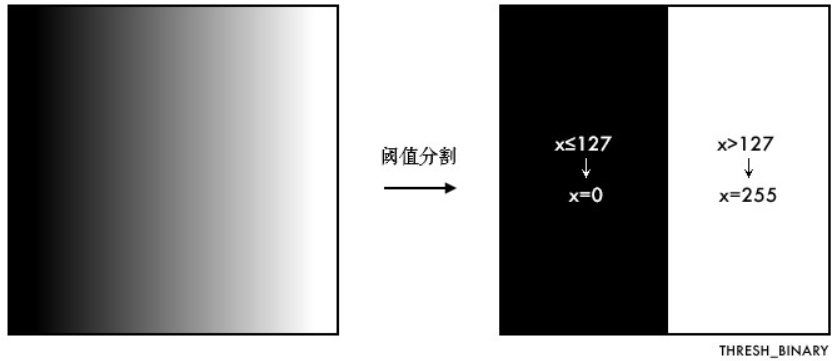

用cv2.threshold(image，thresh, maxval, type)函数对图像进行图像二值化处理。 thresh,maxval,type三个参数的含义为：如果像素值小于阈值（thresh），则将其设置为0（或者自身），否则将其设置为最大值maxval（或者255），取决于具体的tpye.
Type表示不同类型的阈值。这些阈值类型包括：
cv.THRESH_BINARY 
cv.THRESH_BINARY_INV
cv.THRESH_TRUNC
cv.THRESH_TOZERO
cv.THRESH_TOZERO_INV
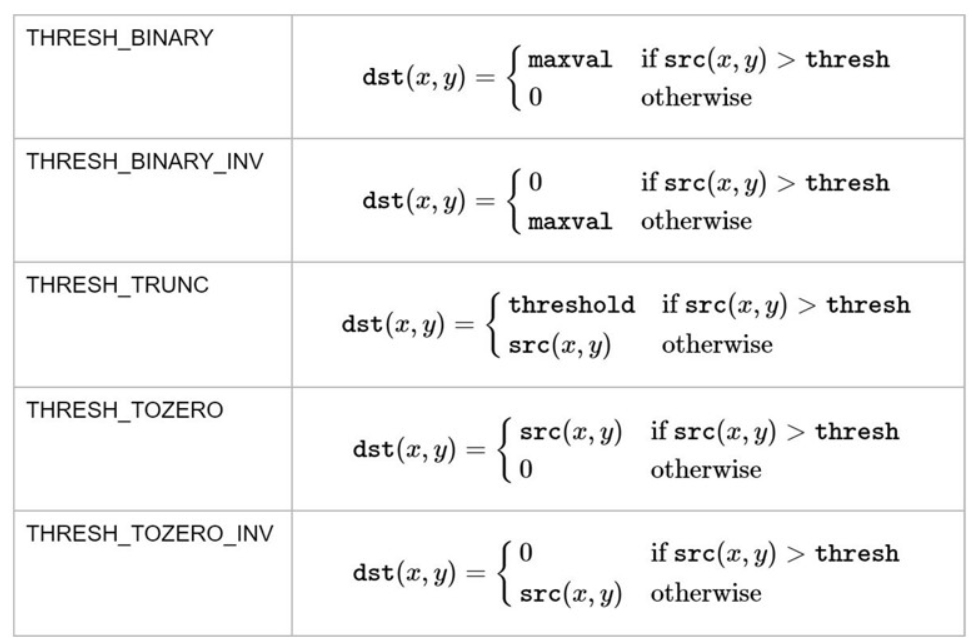

In [7]:
import cv2
import numpy as np
img = cv2.imread('opencvlogo.jpg',0)
ret,thresh = cv2.threshold(img,240,255,cv2.THRESH_BINARY)    #设置固定阈值进行二值化

cv2.imshow("Masked", thresh)
cv2.waitKey(0)                           
cv2.destroyAllWindows()

#### Otsu阈值分割
在固定阈值中，如何知道所选的阈值效果好不好呢？答案是：不断尝试，所以也被称为经验阈值。
Otsu算法假设图像由前景色和背景色组成，通过统计学的方法来自动选取一个阈值，使得这个阈值可以将前景色和背景色尽可能的分开。

In [4]:
import cv2
import numpy as np
img = cv2.imread('opencvlogo.jpg',0)

ret, mask = cv2.threshold(img, 255, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow("Masked", mask)
cv2.waitKey(0)                           
cv2.destroyAllWindows()

### 自适应二值化
用 cv2.adaptiveThreshold(src,maxValue,adaptiveMethod,thresholdType,blockSize,C)

In [3]:
import cv2
import numpy as np
img = cv2.imread('opencvlogo.jpg',0)
mask = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
cv2.imshow("Masked", mask)
cv2.waitKey(0)                           
cv2.destroyAllWindows()

### 10 边缘检测与卷积运算
边缘检测是图像处理和计算机视觉中，尤其是特征提取的一个重要研究领域。边缘检测的目的是标识数字图像中亮度变化较为明显的点，这些点通常存在于目标、背景区域之间，是图像分割的重要依据。
边缘检测常用的算法有: Sobel算法、拉普拉斯算法、Canny算法等。

#### Sobel算子
Sobel算子通过像素点空间邻域内上下、左右相邻点的灰度加权运算来模拟一阶求导,导数越大的地方说明变化越剧烈,越有可能是边缘。
Sobel 边缘检测通常带有方向性，可以只检测水平边缘或垂直边缘或都检测。
经典Sobel的卷积因子为(横向卷积因子、纵向卷积因子)：
![jupyter](./sobel.png)

用卷积的方法，通过设置不同的卷积核，对图像进行边缘检测。

In [8]:
img = cv2.imread("cats.jpeg",0)
convolutionCore = np.array((
                            [-1,-1,-1],
                            [-1,8,-1],
                            [-1,-1,-1]))#拉普拉斯拓展卷积核

 
res = cv2.filter2D(img,-1,convolutionCore)                      #使用opencv的卷积函数
cv2.imshow('frame',res)

cv2.waitKey(0)                           
cv2.destroyAllWindows()

### 11.轮廓
轮廓是一系列相连的点组成的曲线，代表了物体的基本外形。
谈起轮廓不免想到边缘，它们确实很像。简单的说，轮廓是连续的，边缘并不全都连续（下图）。其实边缘主要是作为图像的特征使用，比如可以用边缘特征可以区分脸和手，而轮廓主要用来分析物体的形态，比如物体的周长和面积等，可以说边缘包括轮廓。寻找轮廓的操作一般用于二值化图，所以通常会使用阈值分割或Canny边缘检测先得到二值图。
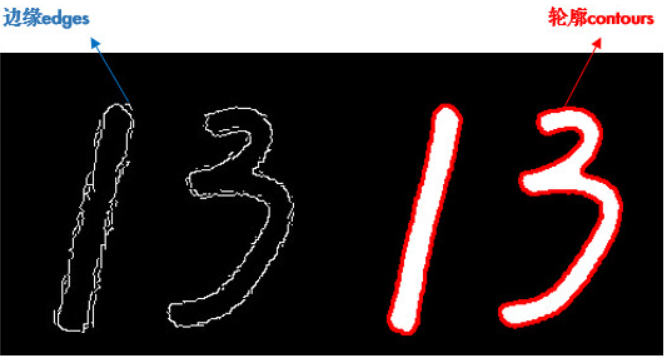

In [26]:
import cv2
img = cv2.imread("contour.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray,240,255,cv2.THRESH_BINARY)

#调用寻找轮廓函数，返回轮廓点及层级结构
contours, hierarchy = cv2.findContours(
    thresh,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE)
print(contours)

(array([[[ 40,  32]],

       [[ 40, 215]],

       [[422, 215]],

       [[422,  32]]], dtype=int32), array([[[215,  52]],

       [[216,  51]],

       [[235,  51]],

       [[236,  52]],

       [[241,  52]],

       [[242,  53]],

       [[245,  53]],

       [[246,  54]],

       [[248,  54]],

       [[249,  55]],

       [[251,  55]],

       [[252,  56]],

       [[254,  56]],

       [[255,  57]],

       [[256,  57]],

       [[257,  58]],

       [[258,  58]],

       [[259,  59]],

       [[260,  59]],

       [[261,  60]],

       [[262,  60]],

       [[264,  62]],

       [[265,  62]],

       [[266,  63]],

       [[267,  63]],

       [[270,  66]],

       [[271,  66]],

       [[284,  79]],

       [[284,  80]],

       [[287,  83]],

       [[287,  84]],

       [[289,  86]],

       [[289,  87]],

       [[290,  88]],

       [[290,  89]],

       [[291,  90]],

       [[291,  91]],

       [[292,  92]],

       [[292,  93]],

       [[293,  94]],

       [[293,  95

使用cv2.findContours()寻找轮廓，cv2.RETR_TREE: 检测所有轮廓，建立完整的层次结构，cv2.CHAIN_APPROX_SIMPLE:压缩水平，垂直和对角线段，只留下端点。 例如矩形轮廓可以用4个点编码。返回值：contours包含所有轮廓点坐标，hierarchy:轮廓间的层次关系。

#### 绘制轮廓
轮廓找出来后，为了方便观看，可以在图中画出来：cv2.drawContours()函数。

In [27]:
#画出轮廓点
cv2.drawContours(img, contours,-1, (0,0,255), 3)
cv2.imshow('frame',img)
cv2.waitKey(0)                           
cv2.destroyAllWindows()

其中参数2就是得到的contours，参数3表示要绘制哪一条轮廓，-1表示绘制所有轮廓，参数4是颜色（B/G/R通道，所以(0,0,255)表示红色），参数5是线宽。Tips：很多人画图时明明用了彩色，但没有效果，请检查你是在哪个图上画，画在灰度图和二值图上显然是没有彩色的(⊙o⊙)。

#### 轮廓特征
通过轮廓点可以计算物体的周长、面积、质心、外接矩形、最小外接矩形等。

In [ ]:
area = cv2.contourArea(contours[0]) #轮廓面积
perimeter = cv2.arcLength(contours[0], True) #参数2表示轮廓是否封闭，轮廓周长
print(area,perimeter)

#### 外接矩形
形状的外接矩形有两种，如下图，绿色的叫外接矩形，表示不考虑旋转并且能包含整个轮廓的矩形。蓝色的叫最小外接矩，考虑了旋转：
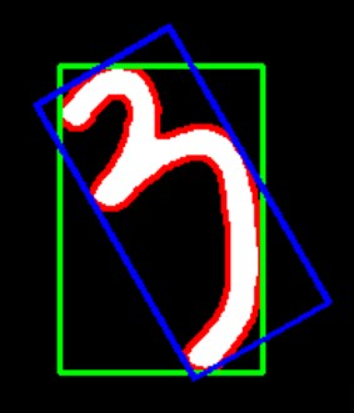

In [ ]:
cnt = contours[2]
x,y,w,h = cv2.boundingRect(cnt)
img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

cv2.imshow('frame',img)
cv2.waitKey(0)                            
cv2.destroyAllWindows()

In [1]:
### 橙色小球跟踪实验
#### start code 
import cv2   
import numpy as np

cap = cv2.VideoCapture('orange.mp4')

###sart code
###设置橙色小球颜色的上下界lower_orange，upper_orange

###end code
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
out = cv2.VideoWriter('ball-track.mp4',fourcc, 20.0, (1280,720),True)
area = []
while(cap.isOpened()):
    ret, img = cap.read()
    if ret:        
        mask = cv2.inRange(img, lower_orange, upper_orange)
        area = []
        img_open = mask.copy()
            
        contours, hierarchy = cv2.findContours(
        mask,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
        
        cv2.drawContours(img, contours,-1, (0,0,255), 3)
        print("len countour",len(contours))
        
        for c in range(len(contours)):
            area.append(cv2.contourArea(contours[c]))
        if area:
            print("area is ",area)
            max_idx = np.argmax(np.array(area))
            print(max_idx)
            cnt = contours[max_idx]
            x,y,w,h = cv2.boundingRect(cnt)
            img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
            img=cv2.line(img,(int(x+w/2),int(y+h/2-2)),(int(x+w/2),int(y+h/2+2)),(255,0,0),2)
            img=cv2.line(img,(int(x+w/2-2),int(y+h/2)),(int(x+w/2+2),int(y+h/2)),(255,0,0),2)
            cv2.imshow('frame',img)
            out.write(img);
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()     
#### end code

NameError: name 'lower_orange' is not defined

### 练习3:红绿灯识别
有了ROI截取、二值化、颜色区间提取、轮廓检测、掩膜、绘图等基础，我们就可以做一些很cool的识别任务啦！
有三张小车拍摄的红绿灯图像，你能从图像中识别出当前是红灯亮、绿灯亮、还是黄灯亮吗？

In [ ]:
import cv2
import numpy as np

#img_all = cv2.imread("yellowlight.jpg")
#img_all = cv2.imread("redlight.jpg")
img_all = cv2.imread("greenlight.jpg")

im_part =                                #请截取红绿灯观察区

blur_img = cv2.medianBlur(im_part,7)
cv2.imshow("origin",im_part)                  
cv2.waitKey(0)          

#yellow template
yellow_lower_orange = 
yellow_upper_orange = 

#green template 
green_lower_orange =   
green_upper_orange = 

#red template 
red_lower_orange = 
red_upper_orange = 

###请用inRange 获得每种颜色的mask

yellow_mask = 
cv2.imshow("yellow_mask",yellow_mask)  

green_mask = 
cv2.imshow("green_mask",green_mask)  

red_mask = 
cv2.imshow("red_mask",red_mask)  

cv2.waitKey(0)     

###请用findContours 获得每种mask的轮廓
yellow_contours, hierarchy = 

green_contours, hierarchy = 

red_contours, hierarchy = 

yellow_area = []
green_area = []
red_area = []

### 请找出最大面积轮廓的id号

for c in range(len(yellow_contours)):
    yellow_area.append(        )
if yellow_area:
    yellow_max_idx = np.argmax(np.array(          ))
        
for c in range(len(green_contours)):
    green_area.append(               )
if green_area:
    green_max_idx = np.argmax(np.array(          ))
      
for c in range(len(red_contours)):
    red_area.append(                )
if red_area:
    red_max_idx = np.argmax(np.array(           ))
     
if green_area:
    #####请用boundingRect 函数计算出该轮廓的外接矩形
    #### 请用绿色画出该矩形
    ###start code
    
    
    ###end code    
    print("only green light on!")
elif yellow_area:
    #####请用boundingRect 函数计算出该轮廓的外接矩形
    #### 请用黄色画出该矩形
    ###start code
    
    
    ###end code 
    print("only yellow light on!")
elif red_area:
    #####请用boundingRect 函数计算出该轮廓的外接矩形
    #### 请用红色画出该矩形
    ###start code
    
    
    ###end code 
    print("only red light on!")
else:
    print("no light on!")

img_all[     ] = im_part                               ###将处理好的部分图像赋值给原图
cv2.imshow("contour",img_all) 
cv2.waitKey(0)                            
cv2.destroyAllWindows()

## 12. OpenCV 中的机器学习
OpenCV中有很多机器学习模块，比如人脸检测、SVM分类器。以人脸检测为例：OpenCV 提供了两种人脸检测方法，包括：
- 基于 Haar 级联的人脸检测器
- 基于深度学习的人脸检测器
基于 Haar 级联的人脸检测器,OpenCV 提供了 4 个级联分类器用于人脸检测，可以从OpenCV 官方下载这些级联分类器文件：
- haarcascade_frontalface_alt.xml 
- haarcascade_frontalface_alt2.xml 
- haarcascade_frontalface_alt_tree.xml 
- haarcascade_frontalface_default.xml 
总的来说这些分类器具有相似的准确率.

OpenCV 提供了 cv2.CascadeClassifier() 函数用于从文件中加载分类器：

In [10]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

接下来，就可以使用 cv2.CascadeClassifier.detectMultiScale() 函数执行检测了：

In [11]:
faces_rects = faceCascade.detectMultiScale(img,scaleFactor = 1.05,minNeighbors = 5,minSize = (30,30),flags = cv2.CASCADE_SCALE_IMAGE)

cv2.CascadeClassifier.detectMultiScale() 函数检测对象并将它们作为矩形列表返回。下面是完整的视频流人脸检测代码：

In [12]:
import cv2              
import numpy as np
cap = cv2.VideoCapture(0) 

while(cap.isOpened()):
    ret, img = cap.read()             
    print(ret)
    if ret:  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        faces_rects = faceCascade.detectMultiScale(img,scaleFactor = 1.1,minNeighbors = 5,minSize = (30,30),flags = cv2.CASCADE_SCALE_IMAGE)
        
        for (x,y,w,h) in faces_rects:
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
           
        cv2.imshow('Press Spacebar to Exit',img) 

        if cv2.waitKey(10) & 0xFF == ord(' '):  # 按下空格键退出
            break
    else: 
        break

cap.release()                          
cv2.destroyAllWindows()

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


OpenCV自带了人脸分类器、人眼检测器、姿态检测、表情识别等分类器。在目录anaconda3\Lib\site-packages\cv2\data下的xml文件中，用到的时候记得把他们copy到自己的folder下。
OpenCV也预训练好了人眼检测模型，haarcascade_eye.xml.可通过 eyes = eye_cascade.detectMultiScale(img)得到眼睛区域。

### DNN 人脸检测

In [13]:
import cv2 as cv

model_bin = "./models/face_detector/opencv_face_detector_uint8.pb"
config_text = "./models/face_detector/opencv_face_detector.pbtxt";


def video_detection():
    # load tensorflow model
    net = cv.dnn.readNetFromTensorflow(model_bin, config=config_text)
    capture = cv.VideoCapture(0)

    # 人脸检测
    while True:
        e1 = cv.getTickCount()
        ret, frame = capture.read()
        if ret is not True:
            break
        h, w, c = frame.shape
        blobImage = cv.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0), False, False);
        net.setInput(blobImage)
        cvOut = net.forward()

        # Put efficiency information.
        t, _ = net.getPerfProfile()
        label = 'Inference time: %.2f ms' % (t * 1000.0 / cv.getTickFrequency())

        # 绘制检测矩形
        for detection in cvOut[0,0,:,:]:
            score = float(detection[2])
            objIndex = int(detection[1])
            if score > 0.5:
                left = detection[3]*w
                top = detection[4]*h
                right = detection[5]*w
                bottom = detection[6]*h

                # 绘制
                cv.rectangle(frame, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), thickness=2)
                cv.putText(frame, "score:%.2f"%score, (int(left), int(top)), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        e2 = cv.getTickCount()
        fps = cv.getTickFrequency() / (e2 - e1)
        cv.putText(frame, label + (" FPS: %.2f"%fps), (10, 50), cv.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
        cv.imshow('face-detection-demo', frame)
        c = cv.waitKey(1)
        if c == 27:
            break
    cv.destroyAllWindows()


if __name__ == "__main__":
    video_detection()

#### 拓展练习：
像抖音小视频app，里面会有很多有趣的道具，比如带上帽子、眼镜、化妆等等，做一个自己的小道具--给视频里的自己带上圣诞帽吧！

In [ ]:
import cv2              
import numpy as np
# 帽子图像
hat_img = cv2.imread("xmashat.png", -1)
r,g,b,a = cv2.split(hat_img) 
rgb_hat = cv2.merge((r,g,b))
 # 分离alpha通道
cv2.imwrite("rgb_hat.jpg",rgb_hat)
print(hat_img.shape)

cap = cv2.VideoCapture(0) 

while(cap.isOpened()):
    ret, img = cap.read()             
    print(ret)
    if ret:  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        faces_rects = faceCascade.detectMultiScale(img,scaleFactor = 1.05,minNeighbors = 5,minSize = (30,30),flags = cv2.CASCADE_SCALE_IMAGE)
        for (x,y,w,h) in faces_rects:
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            ###start code
            ####请按照人脸框大小调整帽子图像的高度尺寸
            
            
            ####请按照该尺寸缩放帽子rgb图与a图
            
            ####新建一个与视频图像同等大小的单通道图、3通道图
            
            ####单通道图在合适位置用缩放过的a图覆盖，得到mask（设置条件）
            
            ####合适位置用彩色帽子图覆盖
                
            ####mask 按位与3通道图彩色帽子图

            
            ####~mask 按位与视频图像
    
            ####将两部分结果相加
              img = cv2.add(person, hat)
                ### end code
            
            cv2.imshow('Press Spacebar to Exit',img) 

        if cv2.waitKey(10) & 0xFF == ord(' '):  # 按下空格键退出
            break
    else:
        break

cap.release()                          
cv2.destroyAllWindows()